In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/StockData/SamSung.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,40250.0,40700.0,40150.0,40450.0,35281.417969,12024279
1,2018-12-13,40650.0,40750.0,40000.0,40000.0,34888.921875,26254646
2,2018-12-14,40200.0,40200.0,38700.0,38950.0,33973.089844,19671783
3,2018-12-17,38650.0,39600.0,38650.0,39150.0,34147.535156,11532968
4,2018-12-18,38300.0,39200.0,38300.0,38900.0,33929.472656,11042101
...,...,...,...,...,...,...,...
1227,2023-12-06,71800.0,72100.0,71600.0,71700.0,71700.000000,8123087
1228,2023-12-07,71800.0,71900.0,71100.0,71500.0,71500.000000,8862017
1229,2023-12-08,72100.0,72800.0,71900.0,72600.0,72600.000000,10859463
1230,2023-12-11,72800.0,73000.0,72200.0,73000.0,73000.000000,9861960


In [4]:
df1=df.reset_index()['Close']
df1 = df1.dropna() #clean data
df1

0       40450.0
1       40000.0
2       38950.0
3       39150.0
4       38900.0
         ...   
1227    71700.0
1228    71500.0
1229    72600.0
1230    73000.0
1231    73500.0
Name: Close, Length: 1232, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#in shape của từng tập dư liệu
print(X_train.shape, X_test.shape)

(1104, 3, 1) (120, 3, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, LSTM #thêm thư viện Dropout để tránh overfitting
from tensorflow.keras.callbacks import EarlyStopping
#import adam
from tensorflow.keras.optimizers import Adam
#import thư viện mean_squared_error
from tensorflow.keras.losses import MeanSquaredError

#import cac metrics nhu mse,mae,rmse
from tensorflow.keras import metrics

#import cac loss function nhu mse,mae,rmse,mape
from tensorflow.keras import losses

# Tạo model
model = Sequential()

input_shape = (time_step, 1)
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(32, input_shape=input_shape, return_sequences=True))
model.add(LSTM(16))


model.add(Dense(5))
model.add(Dropout(0.2))

model.add(Dense(1))

# Compile model với các tham số: optimizer, loss, metrics
model.compile (loss= "mean_squared_error", optimizer=Adam(learning_rate=0.0001), metrics="mean_squared_error")
early_stop = EarlyStopping(monitor='val_loss', verbose=1,patience=50, restore_best_weights=True)

In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1,callbacks=[early_stop])

Epoch 1/200
18/18 [==============================] - 17s 92ms/step - loss: 0.2549 - mean_squared_error: 0.2549 - val_loss: 0.3494 - val_mean_squared_error: 0.3494
Epoch 2/200
18/18 [==============================] - 0s 12ms/step - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 0.3237 - val_mean_squared_error: 0.3237
Epoch 3/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2170 - mean_squared_error: 0.2170 - val_loss: 0.2967 - val_mean_squared_error: 0.2967
Epoch 4/200
18/18 [==============================] - 0s 12ms/step - loss: 0.1989 - mean_squared_error: 0.1989 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 5/200
18/18 [==============================] - 0s 13ms/step - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.2369 - val_mean_squared_error: 0.2369
Epoch 6/200
18/18 [==============================] - 0s 12ms/step - loss: 0.1535 - mean_squared_error: 0.1535 - val_loss: 0.2025 - val_mean_squared_error: 0.2025
Epoch 7/200
18/18 [========

In [12]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

print(train_predict.shape, y_pred.shape)

4/4 [==============================] - 0s 5ms/step
(1104, 1) (120, 1)


In [13]:
#in shape của từng tập dư liệu y real
print(y_train.shape, y_test.shape)

(1104,) (120,)


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

#in head
print(y_train[:5])

[0.03174603 0.0270775  0.03081232 0.02240896 0.02240896]


In [15]:
#Chuẩn hóa ngược lại y_test và y_train sau khi đã reshape
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
y_train=scaler.inverse_transform(y_train)
y_test=scaler.inverse_transform(y_test)

#in head
print(y_train[:5])

[[39150.]
 [38900.]
 [39100.]
 [38650.]
 [38650.]]


In [16]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
print('Testing RMSE:', test_rmse)
print('Training RMSE:', train_rmse)
# 8+. Tính MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
train_mape = mean_absolute_percentage_error(y_train, train_predict)
print('Training MAPE:', train_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)
train_mae = mean_absolute_error(y_train, train_predict)
print('Training MAE:', train_mae)

Testing RMSE: 1445.76387799954
Training RMSE: 1703.9604909579052
Testing MAPE: 0.015367746233246611
Training MAPE: 0.022568746480517737
Testing MAE: 1082.83662109375
Training MAE: 1305.1123400701993


In [17]:
# Chuẩn bị dữ liệu cho dự đoán tiếp theo

# Lấy time_step ngày cuối cùng của dữ liệu train để dự đoán 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(-1, 1)   #[-time_step:] lấy time_step phần tử cuối cùng của dữ liệu
print("x_input.shape = ", x_input.shape)

# Dự đoán 30 ngày tiếp theo
lst_output = []

i = 1  #biến đếm để dừng vòng lặp while
while(i <= 30):
    print("-----------------")
    #dua ve mang array 1 chieu
    list_input = x_input.reshape(1, -1)[0]
    #in ra x_input cuar ngày thứ i trong 30 ngày tiếp theo
    print("day ", i, " have input = ", list_input)

    # Dự đoán giá đóng của ngày tiếp theo
    x_input = x_input.reshape(1, time_step, 1) #reshape lại về dạng (1, time_step, 1)
    yhat = model.predict(x_input, verbose=0) #dự đoán giá đóng của ngày tiếp theo

    #in ra giá đóng của ngày thứ i trong 30 ngày tiếp theo
    print("day ",i," have output = ", yhat[0][0])

    #thêm giá đóng của ngày thứ i vào lst_output
    lst_output.append(yhat[0][0])

    #xoa phan tu dau tien cua x_input
    x_input = np.delete(x_input, 0)
    #them yhat vao x_input
    x_input = np.append(x_input, yhat[0][0])


    #tang bien dem len 1
    i = i + 1


x_input.shape =  (3, 1)
-----------------
day  1  have input =  [0.65639589 0.66386555 0.67320261]
day  1  have output =  0.64948225
-----------------
day  2  have input =  [0.66386555 0.67320261 0.64948225]
day  2  have output =  0.65467757
-----------------
day  3  have input =  [0.67320261 0.64948225 0.65467757]
day  3  have output =  0.65364665
-----------------
day  4  have input =  [0.64948225 0.65467757 0.65364665]
day  4  have output =  0.6403197
-----------------
day  5  have input =  [0.65467757 0.65364665 0.64031971]
day  5  have output =  0.641905
-----------------
day  6  have input =  [0.65364665 0.64031971 0.64190501]
day  6  have output =  0.63726026
-----------------
day  7  have input =  [0.64031971 0.64190501 0.63726026]
day  7  have output =  0.62894195
-----------------
day  8  have input =  [0.64190501 0.63726026 0.62894195]
day  8  have output =  0.6276428
-----------------
day  9  have input =  [0.63726026 0.62894195 0.62764281]
day  9  have output =  0.62200516

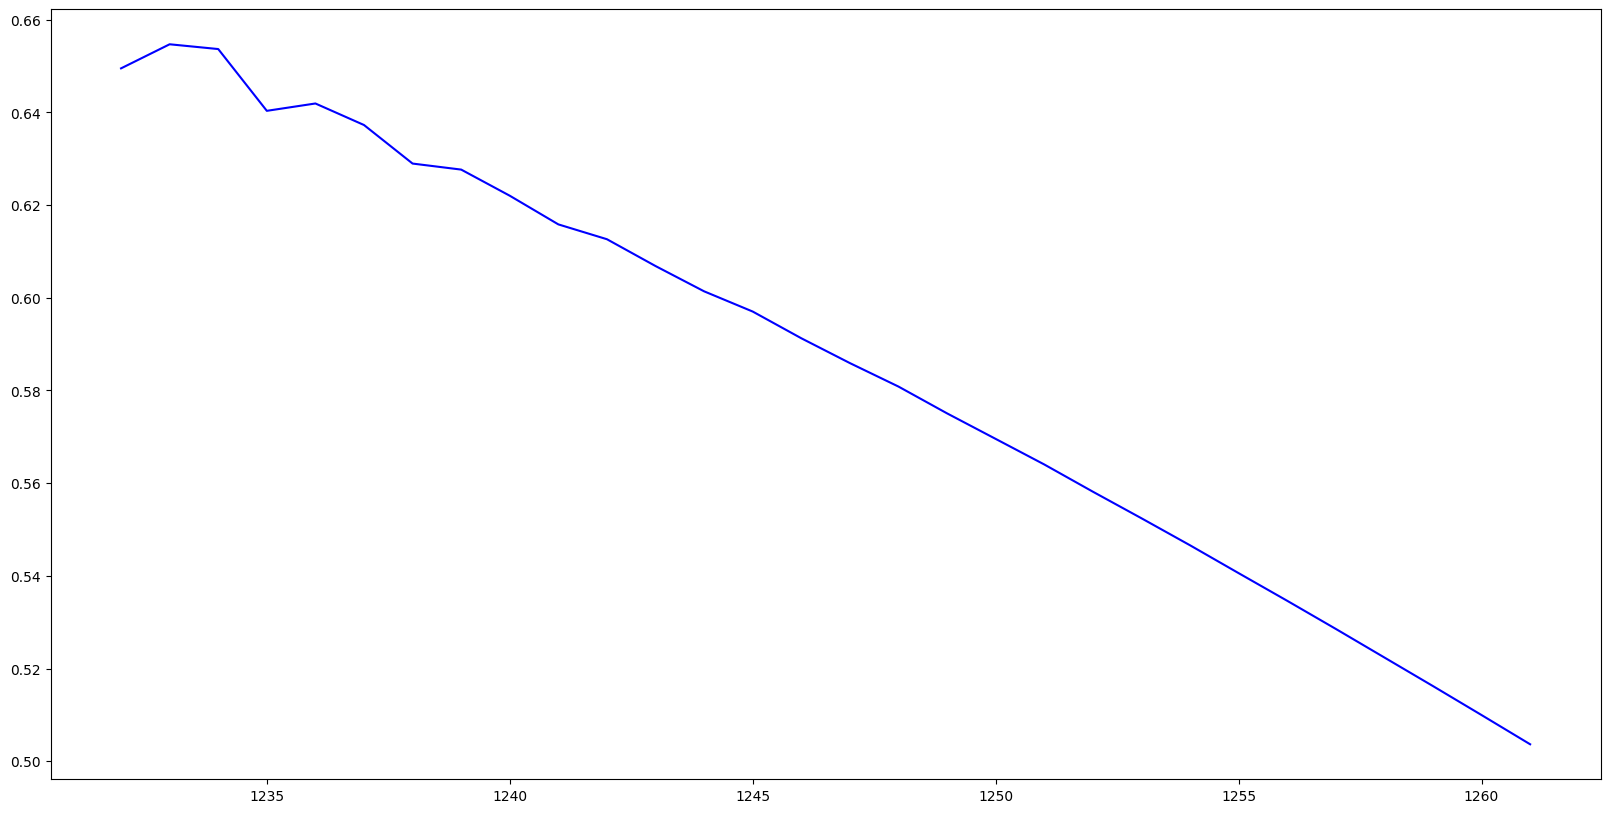

In [18]:
# Tạo mảng index tương ứng với các ngày
days = np.array(range(len(df), len(df) + len(lst_output)))

#vẽ next 30 days
plt.figure(figsize=(20,10))
plt.plot(days, lst_output, c='blue', label='Next 30 days')
plt.show()

In [19]:
#chuẩn hóa ngược lại dữ liệu

train_data_inverse=scaler.inverse_transform(np.array(train_data).reshape(-1, 1))
test_data_inverse=scaler.inverse_transform(np.array(test_data).reshape(-1, 1))
next_30_days_inverse=scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# in dữ liệu
print(train_data_inverse[:5])
print(test_data_inverse[:5])
print(next_30_days_inverse[:5])

[[40450.]
 [40000.]
 [38950.]
 [39150.]
 [38900.]]
[[71900.]
 [71500.]
 [71800.]
 [71200.]
 [71400.]]
[[72229.77 ]
 [72507.984]
 [72452.77 ]
 [71739.125]
 [71824.01 ]]


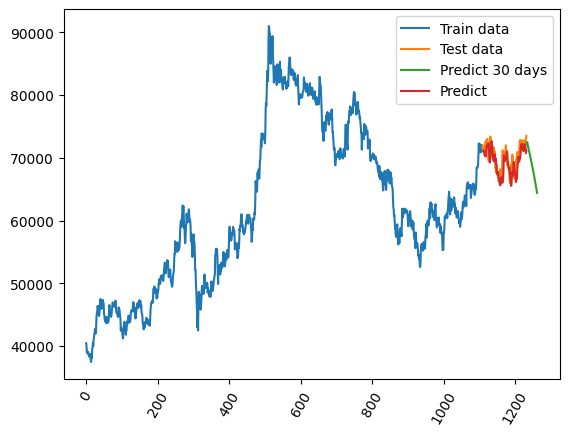

In [20]:
#vẽ y_train nối với ytest với index tương ứng

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
predict30_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)

train_predict_index = pd.RangeIndex(start=0, stop=train_predict.shape[0], step=1)
y_pred_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0], step=1)
#y_pred_val_index = pd.RangeIndex(start=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+(val_size-y_pred_val.shape[0]), stop=train_size+(train_size-train_predict.shape[0])+y_pred.shape[0]+y_pred_val.shape[0]+(val_size-y_pred_val.shape[0]), step=1)

plt.plot(train_data_index, train_data_inverse,  label='Train data')
plt.plot(test_data_index, test_data_inverse, label='Test data')
#plt.plot(val_data_index, val_data_inverse,  label='Val data')
plt.plot(predict30_data_index, next_30_days_inverse, label='Predict 30 days')
plt.plot(y_pred_index, y_pred, label='Predict')
#plt.plot(y_pred_val_index, y_pred_val,  label='Val predict')
# trục x là giá trị của cột Close time của df1
#plt.xticks(np.arange(0, len(df1), 100), df['Date'][0:len(df):100])
#xoay ngang giá trị của trục x
plt.xticks(rotation=60)
plt.legend()
plt.show()


